# Praktikum 4

In diesem Praktikum werden Sie sich mit der Diskreten Fourier Transformation (DFT) und der diskreten Faltung beschäftigen.

Als ersten importieren wir die wichtigsten Module.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import unit_impulse

Die folgende Zelle sorgt dafür, dass Plots größer dargestellt werden.

In [2]:
plt.rcParams["figure.figsize"] = (20,5)

Mit der folgenden Funktion können Sie sich diskrete Signal ausgeben lassen.

In [3]:
def dplot(n, x):
    """
    Plots a discrete signal or frequency spectrum.
    
    Parameters:
        n : numpy.array
            Values of the x-axis
        x : numpy.array
            The signal
    """
    plt.stem(n, x)
    plt.xticks(n)
    plt.yticks([round(xx.real) for xx in x])
    plt.show()

Da wir für die nächsten Aufgaben sinusförmige Signale Untersuchen möchten, wird die folgende Funktion definiert.

In [4]:
def sinusoid(f0=1, n=16, T=1/8):
    """
    A sine wave.
    
    Parameters:
        f0 : float
            Frequency of the sine wave.
        n : integer
            Number of samples.
        T : float
            Sample period.
    """
    n = np.arange(0, n)
    return np.sin(2*np.pi*f0*n*T) 

Die folgende Funktion erzeugt einen Rechteck-Puls.

In [5]:
def rect():
    """
    A simple rectangle pulse.
    """
    a = np.ones(32)
    b = np.zeros(32)
    c = np.append(b, a)
    #c = np.append(c, b)
    return c

## Faltung

Gegeben ist der folgende Rechteckpuls:

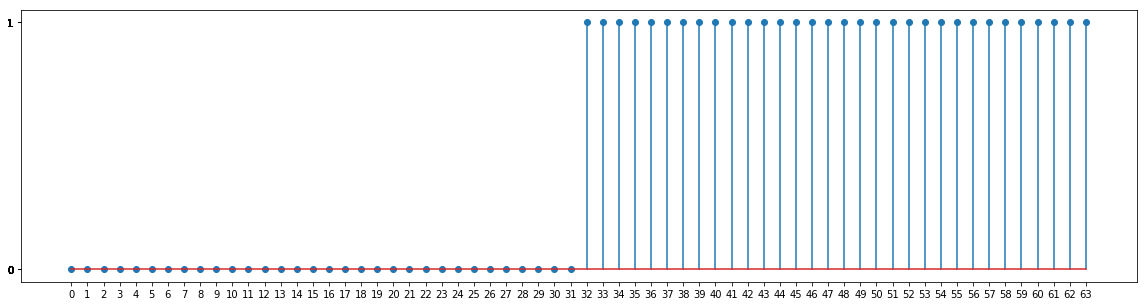

In [6]:
x = rect()
dplot(np.arange(len(x)), x)

**Aufgabe:** Überlegen Sie sich einen Filterkern ("Impulsantwort"), den Sie verwenden können, um die erste steigende und letzte fallende Flanke des Signals zu detektieren. D.h. das resultierende Signal soll zwei Peaks haben: Eine am Anfang und einen am Ende des Rechtecks. Testen Sie Ihren Filterkern mit Hilfe der np.convolve() Funktion.

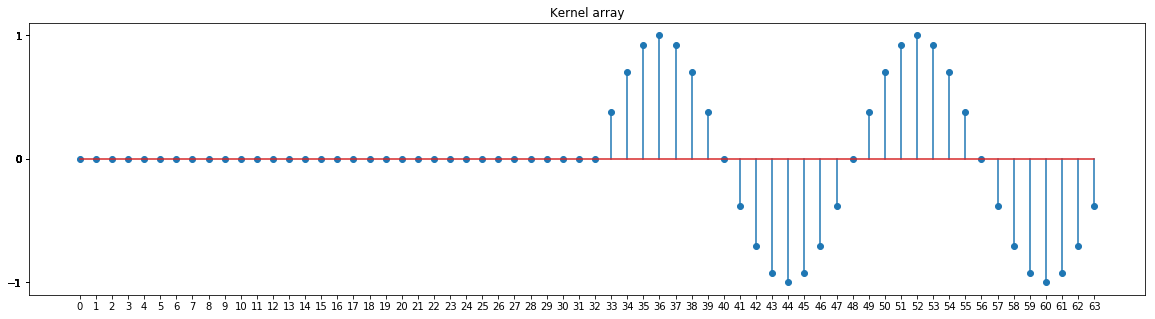

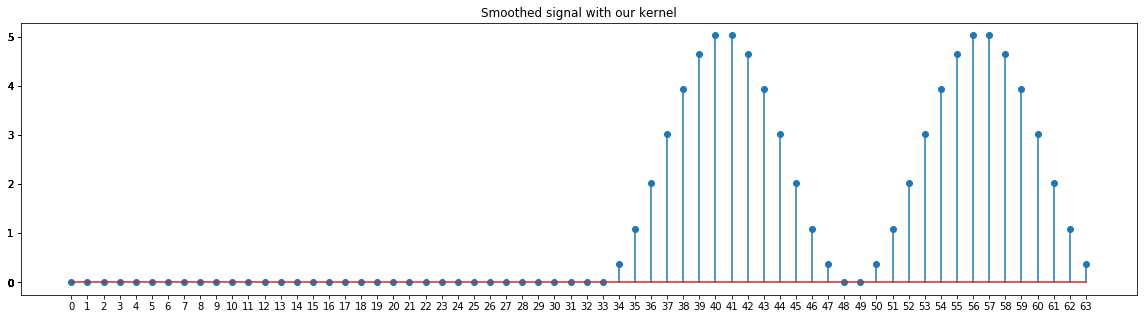

In [8]:
def CosineKernel(signal,n):
    kernel = []
    count = 0
    for i in range(0,len(signal)):
        if signal[i] != 0:
            count = count + 1
        else:
            kernel.append(signal[i]) 
    t = np.arange(count)/count
    impulse = np.cos(n*np.pi*t - np.pi/2)
    kernel = np.concatenate((np.array(kernel),impulse), axis=0)
    return kernel

# Testing our kernel
kernel = CosineKernel(x,4)
plt.title('Kernel array')
dplot(np.arange(len(kernel)),kernel)

# Testing our filter
signal_smooth = np.convolve(x,CosineKernel(x,4), 'same')
plt.title('Smoothed signal with our kernel')
dplot(np.arange(len(signal_smooth)), signal_smooth)

**Aufgabe:** Als nächstes sollen Sie ein periodisches (für diese Aufgabe: 3 Perioden) Rechtecksignal synthetisieren. Schauen Sie sich dazu erstmal an, aus wie vielen Samples das Rechtecksignal besteht. Erzeugen Sie dann mit Hilfe der Funktion ```unit_impulse``` ein geeignetes Signal, welches Sie dann mit dem Rechtecksignal falten. Plotten Sie ihr Signal mit den/m Impuls(en), sowie das resultierende periodische Rechtecksignal aus.

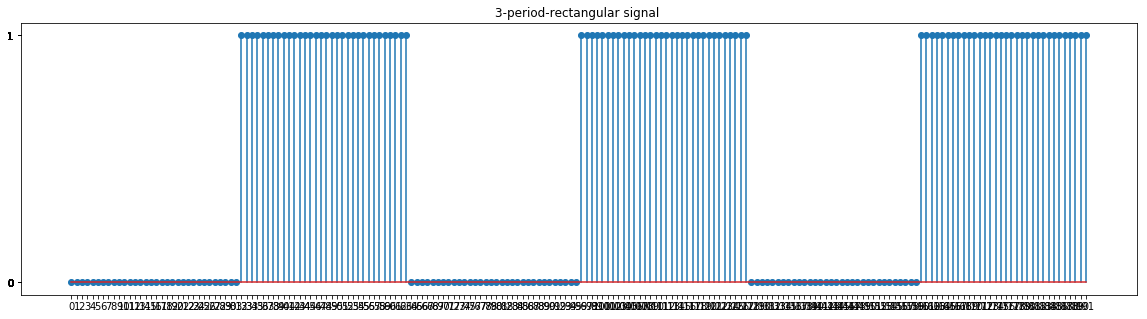

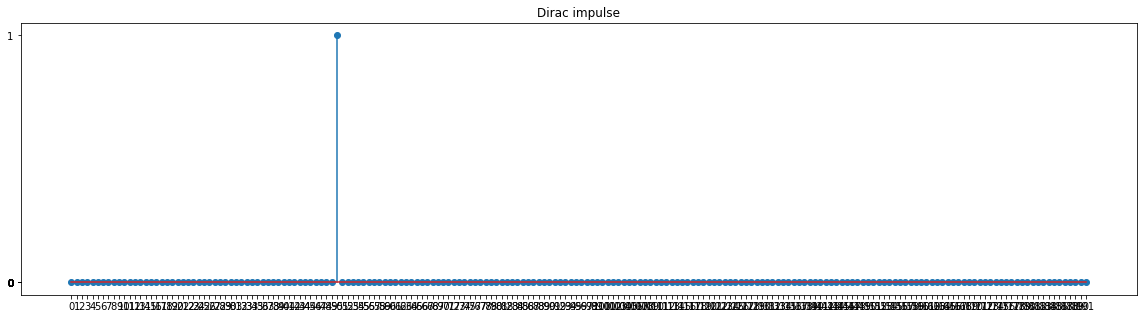

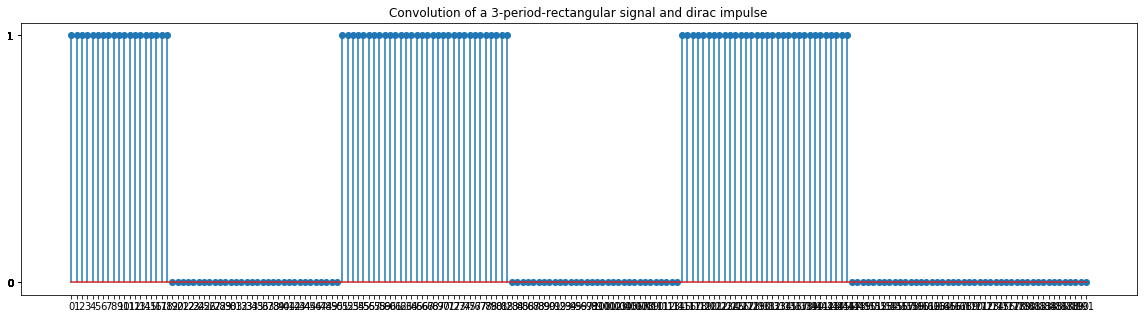

In [9]:
# Create a 3-period-rectangular signal
sig = np.tile(rect(), (1, 3))
sig = np.reshape(sig, sig.size)
# Create a dirac impulse
dirac_imp = signal.unit_impulse(len(sig), 50) # Impulse on 50th element
# Convolution of signal and dirac impulse
sig_conv = np.convolve(sig, dirac_imp, 'same')
# Plot diagrams
plt.title('3-period-rectangular signal ')
dplot(np.arange(len(sig)), sig)
plt.title('Dirac impulse')
dplot(np.arange(len(dirac_imp)), dirac_imp)
plt.title('Convolution of a 3-period-rectangular signal and dirac impulse')
dplot(np.arange(len(sig_conv)), sig_conv)

**Aufgabe:** Berechnen Sie mit Hilfe der Faltung das Ergebnis der folgenden Polynommultiplikation. 

$(3x^7 + 4x^3 + 2x + 7) \cdot (x^5 + 2x^3 + x + 1)$

In [10]:
from sympy import *
x = Symbol('x')
pol_multi = expand((3*x**7 + 4*x**3 + 2*x + 7)*(x**5 + 2*x**3 + x + 1))
print(pol_multi)

3*x**12 + 6*x**10 + 7*x**8 + 3*x**7 + 10*x**6 + 7*x**5 + 8*x**4 + 18*x**3 + 2*x**2 + 9*x + 7


##  Diskrete Fourier Transformation

**Aufgabe:** Implementieren Sie die folgende Funktion zur Berechnung der DFT.

In [35]:
def dft(signal, fs):
    """
    This function calculates the DFT for a signal that was sampled with sampling period fs.
    
    Parameters:
        signal : numpy.array
            The discrete signal
        fs : float
            The sampling rate that was used to sample the signal
        
    Returns:
        numpy.array
            The frequency spectrum.
    """
    
    N = len(signal) # Number of samples
    X = np.zeros(N, dtype=complex) # The resulting frequency spectrum
    
    for k in range(0,N):
        sum = 0
        for n in range(0,N):
            sum = sum + signal[n]*exp(-2*np.pi*1j*n*k/N)
        X[k] = sum
    f = np.arange(0,N)*fs/N
    return f, X

Als nächstes definieren wir ein sinusförmiges Signal mit dem Ihre DFT Implementierung getestet wird.

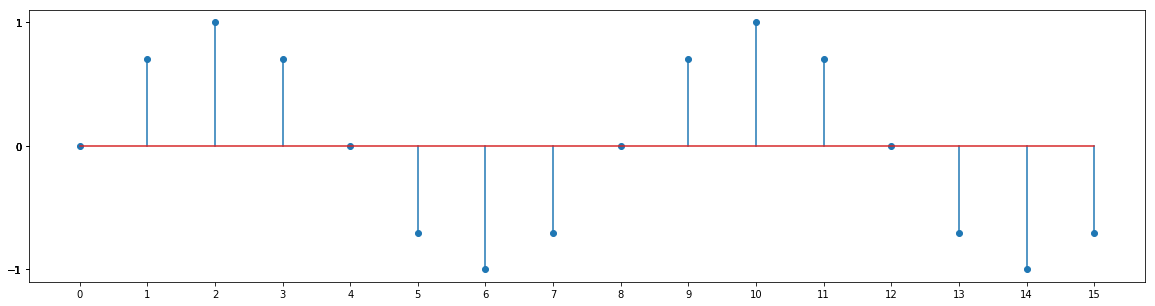

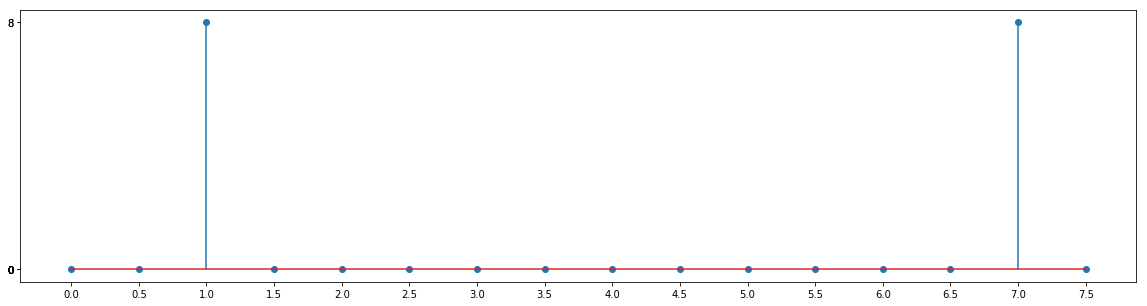

In [36]:
x = sinusoid(f0=1, n=16, T=1/8)
dplot(np.arange(len(x)),x)
f, X = dft(x, fs=8)
dplot(f,abs(X))

Als nächstes wird die in Numpy eingebaute fft Funktion verwendet, um das Frequenzspektrum zu berechnen. Das Ergebnis sollte identisch sein.

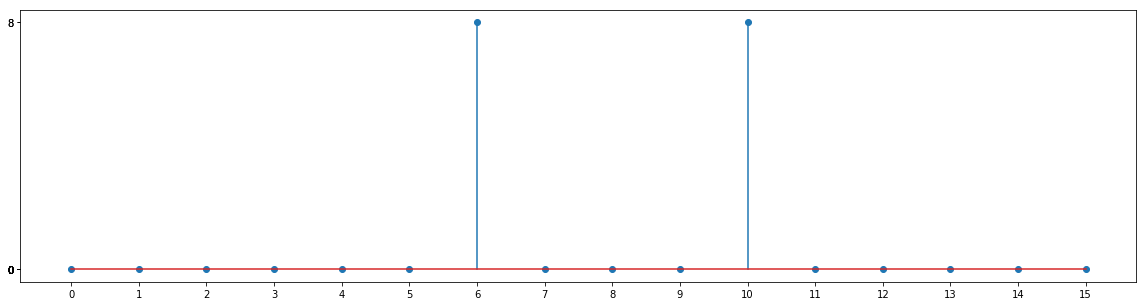

In [37]:
X2 = np.fft.fftshift(np.fft.fft(x))
dplot(np.arange(len(X2)),abs(X2))

Die Beschriftung der Freuenzachse ist bisher noch nicht ideal. Es wird lediglich der Frequenzindex k ausgegeben.

**Aufgabe:** Verbessern Sie Ihre Ausgabe, indem Sie die Frequenzachse mit den Frequenzen beschriften.

Hinweis: Erzeugen Sie ein geeignetes numpy Array und übergeben dieses als ersten Parameter der dplot-Funktion.

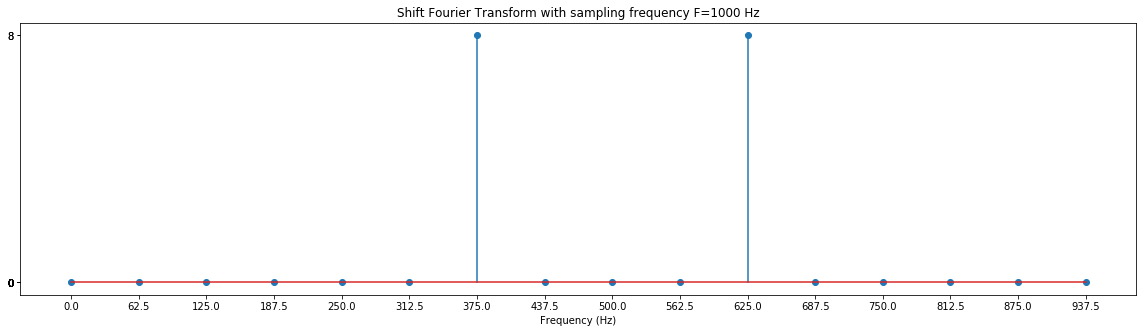

In [39]:
plt.title('Shift Fourier Transform with sampling frequency F=1000 Hz')
plt.xlabel('Frequency (Hz)')
dplot(np.arange(len(X2))*1000/len(X2),abs(X2))

In der Vorlesung haben Sie gelernt, dass bei der DFT spektrale Lecks auftreten können, die zu zusätzlichen spektralen Linien führen. In dieser Aufgabe sollen Sie dieses Phänomen absichtlich provozieren.

**Aufgabe:** Erzeugen Sie eine geeignete Sinusschwingung und das dazugehörige Frequenzspektrum, um das spektrale Lecken zu demonstrieren.

In [ ]:
# YOUR CODE HERE

Gegeben ist das folgende Signal (Addition von mehreren Sinusschwingungen):

In [ ]:
N = 32
fs = 1000
x = sinusoid(f0=100, n=N, T=1/fs) + sinusoid(f0=200, n=N, T=1/fs) + sinusoid(f0=216.625, n=N, T=1/fs)
dplot(np.arange(len(x_complete)), x_complete)

**Aufgabe:** Analysieren Sie das Frequenzspektrum des Signals x mit Hilfe der DFT. Können Sie im Spektrum alle drei Signal identifizieren?

In [ ]:
# YOUR CODE HERE

**Aufgabe:** Überlegen Sie sich, welchen Parameter Sie ändern müssen, um die Auflösung der Frequenzachse zu erhöhen. Testen Sie Ihre Idee. Hat sich dadurch die Situation verbessert?

In [1]:
# YOUR CODE HERE